In [189]:
import pandas as pd
import numpy as np

train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
test_data=pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [191]:
### PANDAS VERSTEHEN ###

women = train_data[train_data.Sex == 'female']["Survived"] #gesamten df nach female und male filtern und davon nur Survived-Spalte ausgeben
men=train_data[train_data.Sex == 'male']['Survived']

# Sum funktioniert nur wenn Eintrag integer ist und weil der Eintrag 1 oder 0 ist
rate_women = sum(women)/len(women) 
rate_men = sum (men)/len(men)
print(str(rate_men) + '% der Maenner überleben und Frauen in % sinds: ' + str(rate_women))

### Einzelne Wahrscheinlichkeiten für Decision Trees #SEX
print(len(women))
print(len(men))
print(len(train_data))
print(sum(women))
print(sum(men))

#PClass - Was gibt es überhaupt für Einträge:
einset=set(train_data["SibSp"])
print(einset)

#PClass - Wie viele jeweils um Argument zu wählen: Wählt der Random Forest das Argument 
print(len(train_data[train_data.SibSp == 8]))
print(len(train_data[train_data.SibSp == 5]))
print(len(train_data[train_data.SibSp == 4]))

#Gleiches Spiel wie bei Frauen:
pclass = (train_data[train_data.SibSp == 8])["Survived"]
print() 
print(len(pclass)) #total
print(sum(pclass)) #survived
print(sum(pclass)/len(pclass))

0.18890814558058924% der Maenner überleben und Frauen in % sinds: 0.7420382165605095
314
577
891
233
109
{0, 1, 2, 3, 4, 5, 8}
7
5
18

7
0
0.0


In [192]:
import matplotlib.pyplot as plt

age_fare=train_data[train_data.Fare<400][['Age', 'Fare']].dropna() #dropna() eliminiert alle Reihen mit NaN #zwei Datenpunkte über 400$ entfernt 
age = age_fare["Age"]
fare = age_fare['Fare']

## gibt für nicht numerische Werte ein True aus 
Non_numeric_values = train_data['Age'].isnull()
print('NaN Values instead of Age: ' + str(len(Non_numeric_values[Non_numeric_values==True]))) # wow 171 NaNs ...
age.head(-1) # here you can see the NaN

age2 = age.dropna()
print(), print('fare und age müssen gleich lang sein für plot, logisch: ')
print(len(fare))
print(len(age))



NaN Values instead of Age: 177

fare und age müssen gleich lang sein für plot, logisch: 
711
711


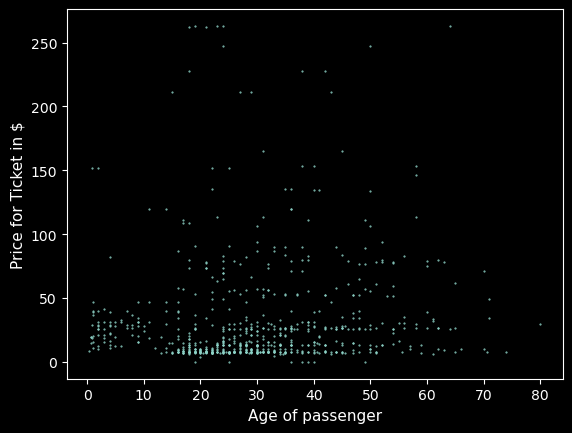

In [193]:
fig, ax = plt.subplots()
ax.scatter(list(age), list(fare), marker= ".", s=1)

plt.ylabel('Price for Ticket in $', fontsize=11)
plt.xlabel('Age of passenger', fontsize=11)
plt.style.use('dark_background')
plt.show() 

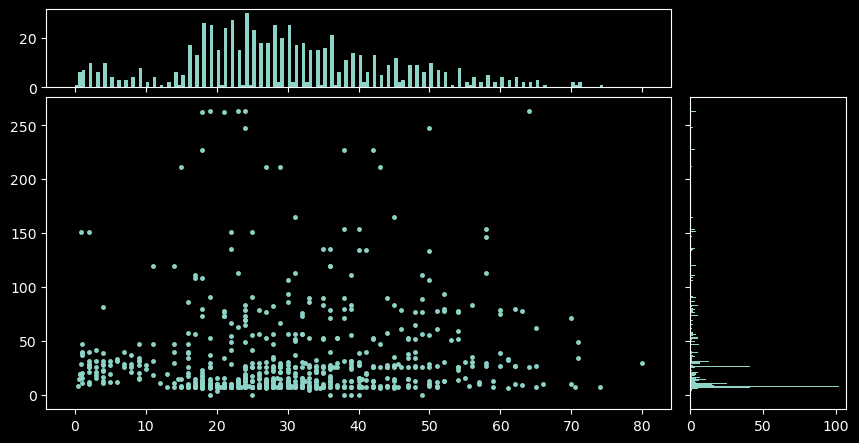

In [194]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, marker=".", s=25)

    # now determine nice limits by hand:
    binwidth = 0.5
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bin_x = np.arange(0, max(age), binwidth)
    bin_y = np.arange(0, lim, binwidth) #np.arange: Start, Stop, Step
    ax_histx.hist(x, bins=bin_x)
    ax_histy.hist(y, bins=bin_y, orientation='horizontal')

# Start with a square Figure.
fig = plt.figure(figsize=(10, 5))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05) 

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.

scatter_hist(list(age), list(fare), ax, ax_histx, ax_histy) 

plt.show()

In [195]:
### Random Forest ###

### RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier 

y = train_data["Survived"] 

features = ["Pclass", "Sex", "SibSp", "Parch"] 

X = pd.get_dummies(train_data[features]) # gibt die Liste ein und konvertiert sie in Pandas Features
X_test = pd.get_dummies(test_data[features]) # 
print(X)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1) # definiert das model # Klasse/Objekt in SKLearn, Klasse RandomForestClassifier, Objekt model
model.fit(X, y) # füttert das Model mit Daten 

predictions = model.predict(X_test) #Erstellt np.array mit Survived
print(len(predictions))
print(len(test_data))

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions}) #Erstellt neuen Dataframe mit Passenger und Survived Spalten
#output.head(10)
#output.to_csv('submission.csv', index=False) #Speichert es als CSV

#dectree = DecisionTreeClassifier(max_depth=3, random_state=3)

     Pclass  SibSp  Parch  Sex_female  Sex_male
0         3      1      0           0         1
1         1      1      0           1         0
2         3      0      0           1         0
3         1      1      0           1         0
4         3      0      0           0         1
..      ...    ...    ...         ...       ...
886       2      0      0           0         1
887       1      0      0           1         0
888       3      1      2           1         0
889       1      0      0           0         1
890       3      0      0           0         1

[891 rows x 5 columns]
418
418


In [196]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

print(iris.target)

y = train_data["Survived"] 
features = ["Pclass", "Sex", "SibSp", "Parch"] 

### Get_dummies wandelt Einträge des Dataframe um in 1 und 0 (stimmt nicht ganz). 
### Erkennt unter Spalte 'Sex' Einträge male und female und kreiert zwei neue Spalten und gibt Einträge in 1 und 0 an
### Was wird dann mit Integer Einträgen wie SibSp = {0,1,2,3,4,5,8} gemacht? Wie bestimmt DecisionTreeClassifier Threshold of Feature

X = pd.get_dummies(train_data[features]) 
#X_test = pd.get_dummies(test_data[features]) 
X_check = train_data[features]

print(X_check) # Was macht ohne getdummies
print(X) #Was macht getdummies

decision_path(X, check_input=True)[source]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
     Pclass     Sex  SibSp  Parch
0         3    male      1      0
1         1  female      1      0
2         3  female      0      0
3         1  female      1      0
4         3    male      0      0
..      ...     ...    ...    ...
886       2    male      0      0
887       1  female      0      0
888       3  female      1      2
889       1    male      0      0
890       3    male      0      0

[891 rows x 4 columns]
     Pclass  SibSp  Parch  Sex_female  Sex_male
0         3      1      0           0         1
1         1      1      0           1         0
2         3      0      0           1         0
3         1      1      0           1         0
4         3      0    

NameError: name 'decision_path' is not defined

In [ ]:
### First Approach ### 
'''
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=3) # setting up the tree
iris = load_iris() # load data-set
model=cross_val_score(clf, iris.data, iris.target, cv=10) # feed the tree with data
'''
#iris.target is like the Survived Column is a np.array 

In [199]:
### Decision Tree Model ###

### import libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### loading data 

y_train = train_data["Survived"]
col_names = ["Pclass", "Sex", "SibSp", "Parch"] #column_names
X_train = pd.get_dummies(train_data[features]) 
print(X_train.head(5))
X_test = pd.get_dummies(test_data[features])
#y_test= test_data["Survived"]

y_test = pd.read_csv('submission.csv')['Survived']
print(y_test)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=1) #without: Accuracy: 0.937799043062201

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


   Pclass  SibSp  Parch  Sex_female  Sex_male
0       3      1      0           0         1
1       1      1      0           1         0
2       3      0      0           1         0
3       1      1      0           1         0
4       3      0      0           0         1
<class 'numpy.ndarray'>
     0
0    0
1    1
2    0
3    0
4    1
..  ..
413  0
414  1
415  0
416  0
417  0

[418 rows x 1 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64
Accuracy: 0.9712918660287081
